A player must have a minimum of 3,000 plate appearances in order to qualify for overall BA record
****Maybe Drop players who havent played in a full seasons worth of games?****
****Need to fix integrating player name and yearID (Do we do a range?)
****Figure out how we decide who belongs in each decade
*If we want to do regression- data has to be on career level- but then parsing out decades is hard
    *Maybe we then do regression of what plays into getting into HOF overall and then use a groupby decade to show differences 
     in summary statisics over time- do hypothesis testing on this to tell if players are statistically better now vs then?
****Want column of binary 1 or 0 for whether or not player is in HOF
*Run ANNOVA to see if any decade is significantly differnt from the rest over x metric (ie homeruns or BA)
*Chi squared test of hall of famers per decade to see if each decade put out a expected proportion of hall of famers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
#Importing data into dataframes
HOF_Batting = pd.read_csv('Output/sorted_hof_pp_rs_stats.csv')
HOF_Post_Batting = pd.read_csv('Output/sorted_hof_pp_ps_stats.csv')
Post_Batting = pd.read_csv('Output/sorted_pp_ps_stats.csv')
Reg_Batting = pd.read_csv('Output/sorted_pp_rs_stats.csv')


In [3]:
HOF_Batting.head()


,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,SH
0,ashburi01,Richie Ashburn,1950,151,594,84,180,25,14,2,41.0,63,0.0,2.0,11.0
1,slaugen01,Enos Slaughter,1950,148,556,82,161,26,7,10,101.0,66,0.0,2.0,8.0
2,reesepe01,Pee Wee Reese,1950,141,531,97,138,21,5,11,52.0,91,0.0,1.0,10.0
3,willite01,Ted Williams,1950,89,334,82,106,24,1,28,97.0,82,0.0,0.0,0.0
4,irvinmo01,Monte Irvin,1950,110,374,61,112,19,5,15,66.0,52,0.0,5.0,1.0


# Creating Decades column for each dataset

In [4]:
#Create decades column for Regular Season Batting
conditions = [(Reg_Batting["yearID"] >= 1950) & (Reg_Batting['yearID'] < 1960), (Reg_Batting["yearID"] >= 1960) & (Reg_Batting["yearID"] < 1970),
               (Reg_Batting["yearID"] >= 1970) & (Reg_Batting["yearID"] < 1980), (Reg_Batting["yearID"] >= 1980) & (Reg_Batting["yearID"] < 1990),
               (Reg_Batting["yearID"] >= 1990) & (Reg_Batting["yearID"] < 2000), (Reg_Batting["yearID"] >= 2000) & (Reg_Batting["yearID"] < 2010),
               Reg_Batting["yearID"] < 2020
             ]
choices     = ['50s', '60s', '70s','80s', '90s','00s', '10s']
Reg_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Reg_Batting

In [5]:
#Create decades column for Hall of Fame regular season batting
conditions = [(HOF_Batting["yearID"] >= 1950) & (HOF_Batting['yearID'] < 1960), (HOF_Batting["yearID"] >= 1960) & (HOF_Batting["yearID"] < 1970),
               (HOF_Batting["yearID"] >= 1970) & (HOF_Batting["yearID"] < 1980), (HOF_Batting["yearID"] >= 1980) & (HOF_Batting["yearID"] < 1990),
               (HOF_Batting["yearID"] >= 1990) & (HOF_Batting["yearID"] < 2000), (HOF_Batting["yearID"] >= 2000) & (HOF_Batting["yearID"] < 2010),
               HOF_Batting["yearID"] < 2020
             ]
choices     = ['50s', '60s', '70s','80s', '90s','00s', '10s']
HOF_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Batting

In [6]:
#Create decades column for Post Season Batting
conditions = [ (Post_Batting["yearID"] >= 1950) & (Post_Batting['yearID'] < 1960), (Post_Batting["yearID"] >= 1960) & (Post_Batting["yearID"] < 1970),
               (Post_Batting["yearID"] >= 1970) & (Post_Batting["yearID"] < 1980), (Post_Batting["yearID"] >= 1980) & (Post_Batting["yearID"] < 1990),
               (Post_Batting["yearID"] >= 1990) & (Post_Batting["yearID"] < 2000), (Post_Batting["yearID"] >= 2000) & (Post_Batting["yearID"] < 2010),
               Post_Batting["yearID"] < 2020
             ]
choices     = ['50s', '60s', '70s','80s', '90s','00s', '10s']
Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Post_Batting

In [7]:
#Create decades column for Hall of Fame Post-season Batting
conditions = [(HOF_Post_Batting["yearID"] >= 1950) & (HOF_Post_Batting['yearID'] < 1960), (HOF_Post_Batting["yearID"] >= 1960) & (HOF_Post_Batting["yearID"] < 1970),
               (HOF_Post_Batting["yearID"] >= 1970) & (HOF_Post_Batting["yearID"] < 1980), (HOF_Post_Batting["yearID"] >= 1980) & (HOF_Post_Batting["yearID"] < 1990),
               (HOF_Post_Batting["yearID"] >= 1990) & (HOF_Post_Batting["yearID"] < 2000), (HOF_Post_Batting["yearID"] >= 2000) & (HOF_Post_Batting["yearID"] < 2010),
               HOF_Post_Batting["yearID"] < 2020
             ]
choices     = ['50s', '60s', '70s','80s', '90s','00s', '10s']
HOF_Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Post_Batting

# Calculating Career level statistics

In [8]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Post_Batting = HOF_Post_Batting.groupby(['playerID','Name','Decade']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#career_HOF_Post_Batting.head()

In [9]:
#Using GroupBy playerID to get career statistics for players
career_Post_Batting = Post_Batting.groupby(['playerID','Name','Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#career_Post_Batting.head()

In [10]:
#Using GroupBy playerID to get career statistics for players
career_Reg_Batting = Reg_Batting.groupby(['playerID','Name','Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#career_Reg_Batting.head()

In [11]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Batting = HOF_Batting.groupby(['playerID','Name','Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#career_Reg_Batting.head()

# Aggregating stats by Decade


In [12]:
#Using GroupBy playerID to get career statistics for players
decade_Reg_Batting = Reg_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
decade_Reg_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,00s,509425,1616739,228214,435345,87932,9164,51890,217458.0,160525,13181.0,17382.0
1,10s,457204,1447467,187514,372632,73809,7717,44949,178493.0,133303,9284.0,14596.0
2,50s,255135,785015,105722,209175,33366,6897,20511,99315.0,84967,3626.0,4626.0
3,60s,333199,1007858,124425,258488,39930,7577,25729,115896.0,96515,10395.0,6719.0
4,70s,421795,1286417,161052,336003,53884,9094,29255,150101.0,128029,13442.0,7520.0


In [13]:
#Using GroupBy playerID to get career statistics for players
decade_Post_Batting = Post_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
decade_Post_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,00s,6926,21398,2763,5457,1070,100,688,2650,2203,260,264.0
1,10s,6952,20903,2529,4884,909,86,662,2384,1951,208,229.0
2,50s,1253,3734,451,920,123,22,117,411,415,45,22.0
3,60s,1332,4095,482,994,166,29,115,442,355,50,23.0
4,70s,3027,8992,1063,2234,372,63,227,992,848,120,52.0


In [14]:
#Using GroupBy playerID to get career statistics for players
decade_HOF_Batting = HOF_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
decade_HOF_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,00s,12607,44391,7253,12614,2500,171,2223,7305.0,5885,743.0,460.0
1,10s,1077,3650,453,1002,200,6,138,565.0,384,45.0,22.0
2,50s,29533,106347,17543,31466,5090,1125,4091,16349.0,13550,816.0,659.0
3,60s,31729,114232,17482,32377,5207,1015,4916,17370.0,13055,1909.0,755.0
4,70s,28676,101946,15224,28655,4853,769,3929,15504.0,12622,1673.0,551.0


In [15]:
#Using GroupBy playerID to get career statistics for players
decade_HOF_Post_Batting = HOF_Post_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
decade_HOF_Post_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,00s,206,726,102,181,40,0,22,90,92,14,6.0
1,10s,23,89,6,17,3,0,0,6,5,0,1.0
2,50s,354,1254,179,341,54,8,48,145,167,23,7.0
3,60s,174,636,89,177,33,4,34,103,69,9,5.0
4,70s,389,1369,205,372,67,10,67,204,163,30,6.0


# Calculating Batting Stats by Decade


In [79]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
decade_Reg_Batting['BA'] = decade_Reg_Batting['H'] / decade_Reg_Batting['AB']
decade_Reg_Batting['OBP'] = (
    (decade_Reg_Batting['H'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP']) 
    / (decade_Reg_Batting['AB'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP'])
                               )
decade_Reg_Batting['SLG']= ( ((decade_Reg_Batting['H'] - (decade_Reg_Batting['2B'] + decade_Reg_Batting['3B'] + decade_Reg_Batting['HR']) )
                              + 2*decade_Reg_Batting['2B'] + 3*decade_Reg_Batting['3B'] + 4*decade_Reg_Batting['HR'])
                            / (decade_Reg_Batting['AB'])
                            )
decade_Reg_Batting['OPS']= decade_Reg_Batting['SLG'] + decade_Reg_Batting['OBP']
decade_Reg_Batting

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,BA,OBP,SLG,OPS
0,00s,509425,1616739,228214,435345,87932,9164,51890,217458.0,160525,13181.0,17382.0,0.269274,0.341712,0.431285,0.772997
1,10s,457204,1447467,187514,372632,73809,7717,44949,178493.0,133303,9284.0,14596.0,0.257437,0.326277,0.412253,0.738529
2,50s,255135,785015,105722,209175,33366,6897,20511,99315.0,84967,3626.0,4626.0,0.266460,0.341602,0.404920,0.746522
3,60s,333199,1007858,124425,258488,39930,7577,25729,115896.0,96515,10395.0,6719.0,0.256473,0.325555,0.387712,0.713268
4,70s,421795,1286417,161052,336003,53884,9094,29255,150101.0,128029,13442.0,7520.0,0.261193,0.331620,0.385443,0.717062
5,80s,443568,1346422,172566,353262,60930,9056,32789,161736.0,129540,13024.0,7163.0,0.262371,0.330360,0.394134,0.724494
6,90s,464607,1435067,199328,384986,72232,8565,41186,188161.0,146254,12203.0,11930.0,0.268270,0.340919,0.416640,0.757559


In [17]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
decade_Post_Batting['BA'] = decade_Post_Batting['H'] / decade_Post_Batting['AB']
decade_Post_Batting['OBP'] = (
    (decade_Post_Batting['H'] + decade_Post_Batting['BB']  + decade_Post_Batting['HBP']) 
    / (decade_Post_Batting['AB'] + decade_Post_Batting['BB']  + decade_Post_Batting['HBP'])
                               )
decade_Post_Batting['SLG']= ( ((decade_Post_Batting['H'] - (decade_Post_Batting['2B'] + decade_Post_Batting['3B'] + decade_Post_Batting['HR']) )
                              + 2*decade_Post_Batting['2B'] + 3*decade_Post_Batting['3B'] + 4*decade_Post_Batting['HR'])
                            / (decade_Post_Batting['AB'])
                            )
decade_Post_Batting['OPS']= decade_Post_Batting['SLG'] + decade_Post_Batting['OBP']
decade_Post_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,BA,OBP,SLG,OPS
0,00s,6926,21398,2763,5457,1070,100,688,2650,2203,260,264.0,0.255024,0.332034,0.410833,0.742867
1,10s,6952,20903,2529,4884,909,86,662,2384,1951,208,229.0,0.233651,0.306026,0.380376,0.686402
2,50s,1253,3734,451,920,123,22,117,411,415,45,22.0,0.246385,0.325342,0.385110,0.710451
3,60s,1332,4095,482,994,166,29,115,442,355,50,23.0,0.242735,0.306729,0.381685,0.688414
4,70s,3027,8992,1063,2234,372,63,227,992,848,120,52.0,0.248443,0.316822,0.379560,0.696381


In [80]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
decade_HOF_Batting['BA'] = decade_HOF_Batting['H'] / decade_HOF_Batting['AB']
decade_HOF_Batting['OBP'] = (
    (decade_HOF_Batting['H'] + decade_HOF_Batting['BB']  + decade_HOF_Batting['HBP']) 
    / (decade_HOF_Batting['AB'] + decade_HOF_Batting['BB']  + decade_HOF_Batting['HBP'])
                               )
decade_HOF_Batting['SLG']= ( ((decade_HOF_Batting['H'] - (decade_HOF_Batting['2B'] + decade_HOF_Batting['3B'] + decade_HOF_Batting['HR']) )
                              + 2*decade_HOF_Batting['2B'] + 3*decade_HOF_Batting['3B'] + 4*decade_HOF_Batting['HR'])
                            / (decade_HOF_Batting['AB'])
                            )
decade_HOF_Batting['OPS']= decade_HOF_Batting['SLG'] + decade_HOF_Batting['OBP']
decade_HOF_Batting

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,BA,OBP,SLG,OPS
0,00s,12607,44391,7253,12614,2500,171,2223,7305.0,5885,743.0,460.0,0.284157,0.373679,0.498412,0.872091
1,10s,1077,3650,453,1002,200,6,138,565.0,384,45.0,22.0,0.274521,0.347140,0.446027,0.793167
2,50s,29533,106347,17543,31466,5090,1125,4091,16349.0,13550,816.0,659.0,0.295880,0.378870,0.480305,0.859175
3,60s,31729,114232,17482,32377,5207,1015,4916,17370.0,13055,1909.0,755.0,0.283432,0.360718,0.475891,0.836609
4,70s,28676,101946,15224,28655,4853,769,3929,15504.0,12622,1673.0,551.0,0.281080,0.363346,0.459390,0.822736
5,80s,29527,109723,17143,31786,5580,861,3578,15301.0,12784,1557.0,591.0,0.289693,0.366870,0.454071,0.820941
6,90s,27947,102743,16740,30483,5752,587,3697,15472.0,12772,1513.0,792.0,0.296692,0.378713,0.472052,0.850765


In [78]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
decade_HOF_Post_Batting['BA'] = decade_HOF_Post_Batting['H'] / decade_HOF_Post_Batting['AB']
decade_HOF_Post_Batting['OBP'] = (
    (decade_HOF_Post_Batting['H'] + decade_HOF_Post_Batting['BB']  + decade_HOF_Post_Batting['HBP']) 
    / (decade_HOF_Post_Batting['AB'] + decade_HOF_Post_Batting['BB']  + decade_HOF_Post_Batting['HBP'])
                               )
decade_HOF_Post_Batting['SLG']= ( ((decade_HOF_Post_Batting['H'] - (decade_HOF_Post_Batting['2B'] + decade_HOF_Post_Batting['3B'] + decade_HOF_Post_Batting['HR']) )
                              + 2*decade_HOF_Post_Batting['2B'] + 3*decade_HOF_Post_Batting['3B'] + 4*decade_HOF_Post_Batting['HR'])
                            / (decade_HOF_Post_Batting['AB'])
                            )
decade_HOF_Post_Batting['OPS']= decade_HOF_Post_Batting['SLG'] + decade_HOF_Post_Batting['OBP']
decade_HOF_Post_Batting

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,BA,OBP,SLG,OPS
0,00s,206,726,102,181,40,0,22,90,92,14,6.0,0.249311,0.338592,0.395317,0.733909
1,10s,23,89,6,17,3,0,0,6,5,0,1.0,0.191011,0.242105,0.224719,0.466824
2,50s,354,1254,179,341,54,8,48,145,167,23,7.0,0.271930,0.360644,0.442584,0.803228
3,60s,174,636,89,177,33,4,34,103,69,9,5.0,0.278302,0.353521,0.503145,0.856666
4,70s,389,1369,205,372,67,10,67,204,163,30,6.0,0.271731,0.351756,0.482104,0.833859
5,80s,354,1357,191,368,61,18,38,149,160,15,4.0,0.271186,0.349770,0.426676,0.776446
6,90s,448,1649,237,465,79,9,57,204,223,31,12.0,0.281989,0.371550,0.444512,0.816062


In [20]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
#Reg_Batting.head()

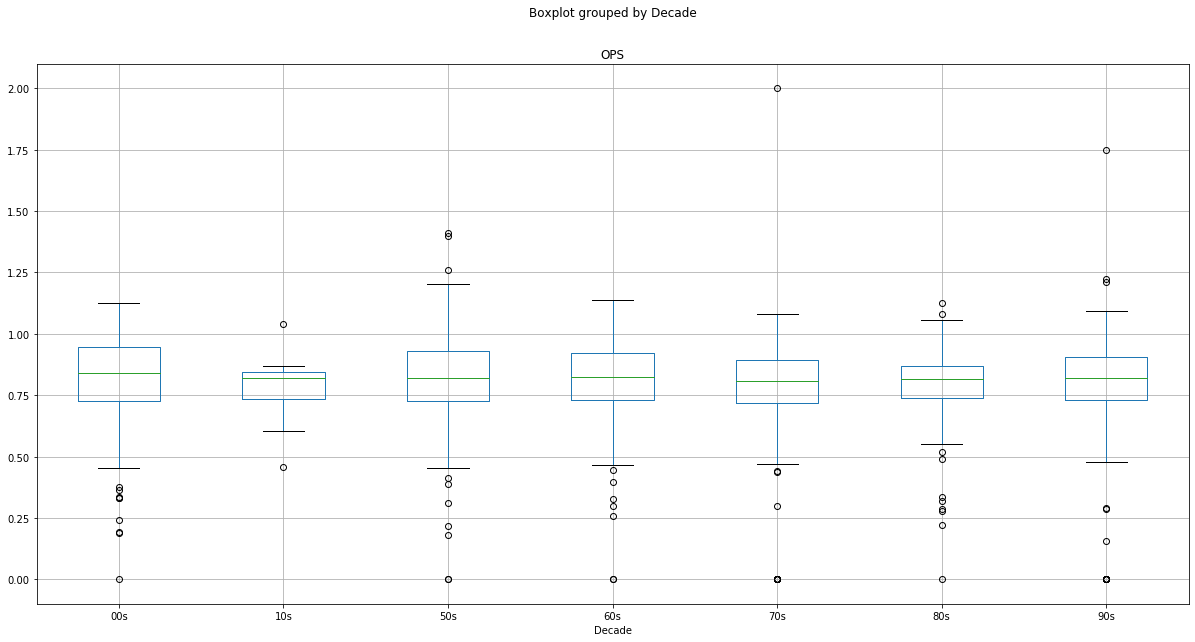

In [66]:
HOF_Batting.boxplot("OPS", by="Decade", figsize=(20, 10))

In [156]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
Reg_Batting.head()

,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,SH,Decade,BA,OBP,SLG,OPS
0,caldesa01,Sam Calderone,1950,34,67,9,20,1,0,1,12.0,2,0.0,0.0,1.0,50s,0.298507,0.318841,0.358209,0.677050
1,workmha01,Hank Workman,1950,2,5,1,1,0,0,0,0.0,0,0.0,0.0,0.0,50s,0.200000,0.200000,0.200000,0.400000
2,stephve01,Vern Stephens,1950,149,628,125,185,34,6,30,144.0,65,0.0,0.0,0.0,50s,0.294586,0.360750,0.511146,0.871897
3,chitiha01,Harry Chiti,1950,3,6,0,2,0,0,0,0.0,0,0.0,0.0,0.0,50s,0.333333,0.333333,0.333333,0.666667
4,maloned01,Eddie Malone,1950,31,71,2,16,2,0,0,10.0,10,0.0,0.0,0.0,50s,0.225352,0.320988,0.253521,0.574509


In [52]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
HOF_Batting['BA'] = HOF_Batting['H'] / HOF_Batting['AB']
HOF_Batting['OBP'] = (
    (HOF_Batting['H'] + HOF_Batting['BB']  + HOF_Batting['HBP']) 
    / (HOF_Batting['AB'] + HOF_Batting['BB']  + HOF_Batting['HBP'])
                               )
HOF_Batting['SLG']= ( ((HOF_Batting['H'] - (HOF_Batting['2B'] + HOF_Batting['3B'] + HOF_Batting['HR']) )
                              + 2*HOF_Batting['2B'] + 3*HOF_Batting['3B'] + 4*HOF_Batting['HR'])
                            / (HOF_Batting['AB'])
                            )
HOF_Batting['OPS']= HOF_Batting['SLG'] + HOF_Batting['OBP']
HOF_Batting.head()

,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,SH,Decade,BA,OBP,SLG,OPS
0,ashburi01,Richie Ashburn,1950,151,594,84,180,25,14,2,41.0,63,0.0,2.0,11.0,50s,0.303030,0.371775,0.402357,0.774132
1,slaugen01,Enos Slaughter,1950,148,556,82,161,26,7,10,101.0,66,0.0,2.0,8.0,50s,0.289568,0.366987,0.415468,0.782455
2,reesepe01,Pee Wee Reese,1950,141,531,97,138,21,5,11,52.0,91,0.0,1.0,10.0,50s,0.259887,0.369181,0.380414,0.749596
3,willite01,Ted Williams,1950,89,334,82,106,24,1,28,97.0,82,0.0,0.0,0.0,50s,0.317365,0.451923,0.646707,1.098630
4,irvinmo01,Monte Irvin,1950,110,374,61,112,19,5,15,66.0,52,0.0,5.0,1.0,50s,0.299465,0.392111,0.497326,0.889438


In [53]:
Reg_Batting = Reg_Batting.fillna(0)
HOF_Batting = HOF_Batting.fillna(0)
Post_Batting = Post_Batting.fillna(0)
HOF_Post_Batting = HOF_Post_Batting.fillna(0)

# ANOVA Analysis

In [67]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["SLG"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["SLG"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["SLG"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["SLG"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["SLG"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["SLG"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["SLG"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.4311822183121612, pvalue=0.19910242901887523)

In [69]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["BA"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["BA"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["BA"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["BA"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["BA"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["BA"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["BA"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=2.7906655183271214, pvalue=0.010601345442628548)

In [70]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["HR"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["HR"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["HR"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["HR"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["HR"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["HR"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["HR"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=4.305895639558725, pvalue=0.0002615070493408894)

In [71]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["OPS"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["OPS"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["OPS"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["OPS"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["OPS"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["OPS"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["OPS"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.1573773059802892, pvalue=0.32675534497782976)

In [72]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["OBP"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["OBP"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["OBP"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["OBP"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["OBP"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["OBP"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["OBP"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.6016536700053865, pvalue=0.14303290261121093)

In [73]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["H"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["H"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["H"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["H"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["H"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["H"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["H"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=7.0305739975568775, pvalue=2.2192275437853622e-07)

In [75]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["2B"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["2B"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["2B"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["2B"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["2B"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["2B"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["2B"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=5.917761140576986, pvalue=4.139216751851776e-06)

In [74]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["3B"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["3B"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["3B"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["3B"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["3B"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["3B"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["3B"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=20.864527526254715, pvalue=1.8115286422556466e-23)

In [76]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["AB"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["AB"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["AB"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["AB"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["AB"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["AB"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["AB"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=7.92118012788641, pvalue=2.0872319696774265e-08)

In [77]:
group1 = HOF_Batting[HOF_Batting["Decade"] == '50s']["BB"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '60s']["BB"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '70s']["BB"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '80s']["BB"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '90s']["BB"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '00s']["BB"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '10s']["BB"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.9179076907314876, pvalue=0.07476175317786053)

In [32]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
Reg_Batting.head()

,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,SH,Decade,BA,OBP,SLG,OPS
0,caldesa01,Sam Calderone,1950,34,67,9,20,1,0,1,12.0,2,0.0,0.0,1.0,50s,0.298507,0.318841,0.358209,0.677050
1,workmha01,Hank Workman,1950,2,5,1,1,0,0,0,0.0,0,0.0,0.0,0.0,50s,0.200000,0.200000,0.200000,0.400000
2,stephve01,Vern Stephens,1950,149,628,125,185,34,6,30,144.0,65,0.0,0.0,0.0,50s,0.294586,0.360750,0.511146,0.871897
3,chitiha01,Harry Chiti,1950,3,6,0,2,0,0,0,0.0,0,0.0,0.0,0.0,50s,0.333333,0.333333,0.333333,0.666667
4,maloned01,Eddie Malone,1950,31,71,2,16,2,0,0,10.0,10,0.0,0.0,0.0,50s,0.225352,0.320988,0.253521,0.574509


In [33]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
career_Reg_Batting['BA'] = career_Reg_Batting['H'] / career_Reg_Batting['AB']
career_Reg_Batting['OBP'] = (
    (career_Reg_Batting['H'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP']) 
    / (career_Reg_Batting['AB'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP'])
                               )
career_Reg_Batting['SLG']= ( ((career_Reg_Batting['H'] - (career_Reg_Batting['2B'] + career_Reg_Batting['3B'] + career_Reg_Batting['HR']) )
                              + 2*career_Reg_Batting['2B'] + 3*career_Reg_Batting['3B'] + 4*career_Reg_Batting['HR'])
                            / (career_Reg_Batting['AB'])
                            )
career_Reg_Batting['OPS']= career_Reg_Batting['SLG'] + career_Reg_Batting['OBP']
#career_Reg_Batting.head()

In [36]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Dataframe
career_HOF_Batting['BA'] = career_HOF_Batting['H'] / career_HOF_Batting['AB']
career_HOF_Batting['OBP'] = (
    (career_HOF_Batting['H'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP']) 
    / (career_HOF_Batting['AB'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP'])
                               )
career_HOF_Batting['SLG']= ( ((career_HOF_Batting['H'] - (career_HOF_Batting['2B'] + career_HOF_Batting['3B'] + career_HOF_Batting['HR']) )
                              + 2*career_HOF_Batting['2B'] + 3*career_HOF_Batting['3B'] + 4*career_HOF_Batting['HR'])
                            / (career_HOF_Batting['AB'])
                            )
career_HOF_Batting['OPS']= career_HOF_Batting['SLG'] + career_HOF_Batting['OBP']
#career_HOF_Batting.head()

In [37]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Postseason Dataframe
career_Post_Batting['BA'] = career_Post_Batting['H'] / career_Post_Batting['AB']
career_Post_Batting['OBP'] = (
    (career_Post_Batting['H'] + career_Post_Batting['BB']  + career_Post_Batting['HBP']) 
    / (career_Post_Batting['AB'] + career_Post_Batting['BB']  + career_Post_Batting['HBP'])
                               )
career_Post_Batting['SLG']= ( ((career_Post_Batting['H'] - (career_Post_Batting['2B'] + career_Post_Batting['3B'] + career_Post_Batting['HR']) )
                              + 2*career_Post_Batting['2B'] + 3*career_Post_Batting['3B'] + 4*career_Post_Batting['HR'])
                            / (career_Post_Batting['AB'])
                            )
career_Post_Batting['OPS']= career_Post_Batting['SLG'] + career_Post_Batting['OBP']
#career_Post_Batting.head()

In [38]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Postseason Dataframe
career_HOF_Post_Batting['BA'] = career_HOF_Post_Batting['H'] / career_HOF_Post_Batting['AB']
career_HOF_Post_Batting['OBP'] = (
    (career_HOF_Post_Batting['H'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP']) 
    / (career_HOF_Post_Batting['AB'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP'])
                               )
career_HOF_Post_Batting['SLG']= ( ((career_HOF_Post_Batting['H'] - (career_HOF_Post_Batting['2B'] + career_HOF_Post_Batting['3B'] + career_HOF_Post_Batting['HR']) )
                              + 2*career_HOF_Post_Batting['2B'] + 3*career_HOF_Post_Batting['3B'] + 4*career_HOF_Post_Batting['HR'])
                            / (career_HOF_Post_Batting['AB'])
                            )
career_HOF_Post_Batting['OPS']= career_HOF_Post_Batting['SLG'] + career_HOF_Post_Batting['OBP']
#career_HOF_Post_Batting.head()

In [76]:
#Getting some aggregated summary statistics to better understand the data
career_HOF_Batting_summary = career_HOF_Batting.BA.agg(['mean','max', 'min', 'std'])
career_HOF_Post_Batting_summary = career_HOF_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Post_Batting_summary =career_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Batting_summary = career_Reg_Batting.BA.agg(['mean','max', 'min', 'std'])

In [40]:
print('Career Batting')
career_Reg_Batting_summary

Career Batting


mean    0.231401
max     1.000000
min     0.000000
std     0.070123
Name: BA, dtype: float64

In [41]:
print('Career HOF Batting')
career_HOF_Batting_summary

Career HOF Batting


mean     847.873684
max     1578.000000
min        2.000000
std      474.615049
Name: G, dtype: float64

In [42]:
print('Career Postseason Batting')
career_Reg_Post_Batting_summary

Career Postseason Batting


mean    0.223728
max     1.000000
min     0.000000
std     0.167554
Name: BA, dtype: float64

In [43]:
print('Career HOF Postseason Batting')
career_HOF_Post_Batting_summary


Career HOF Postseason Batting


mean   NaN
max    NaN
min    NaN
std    NaN
Name: BA, dtype: float64

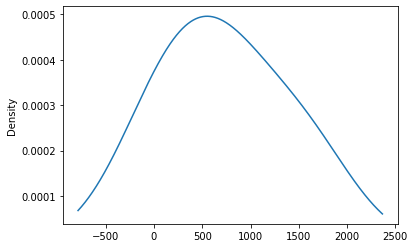

In [44]:
#Density plot of above summary statistic
career_HOF_Batting_summary.plot.kde()


In [45]:
#Homerun boxplot by year
#Reg_Batting.boxplot("AB", by="yearID", figsize=(20, 10))

In [46]:
#Post_Batting.boxplot("HR", by="yearID", figsize=(20, 10))

In [47]:
#HOF_Post_Batting.boxplot("HR", by="yearID", figsize=(20, 10))

KeyError: 'Column not found: BA'

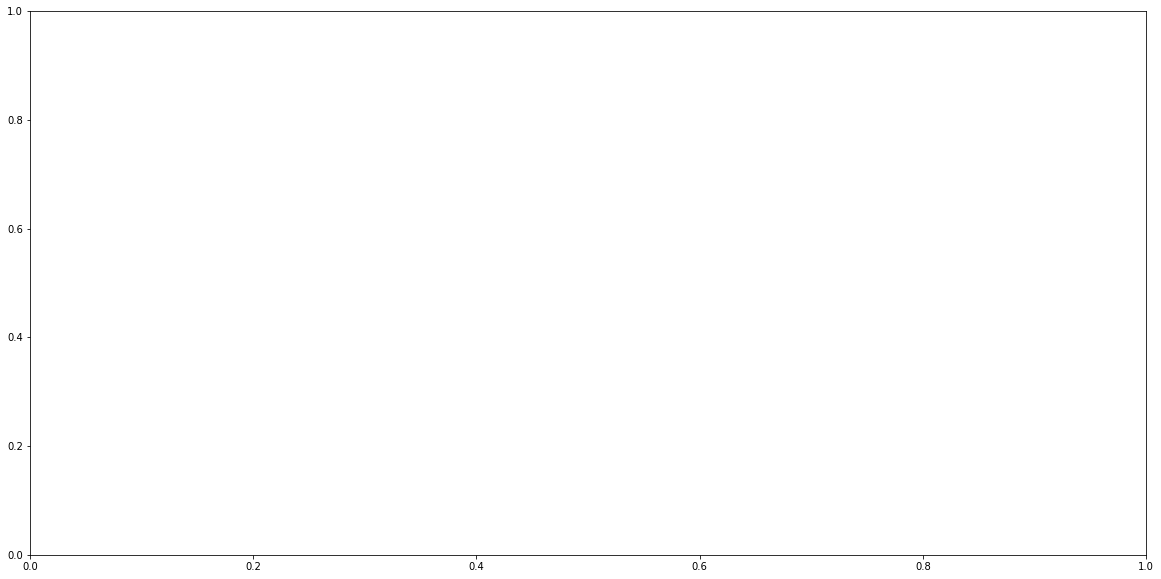

In [78]:
HOF_Batting.boxplot("BA", by="Decade", figsize=(20, 10))

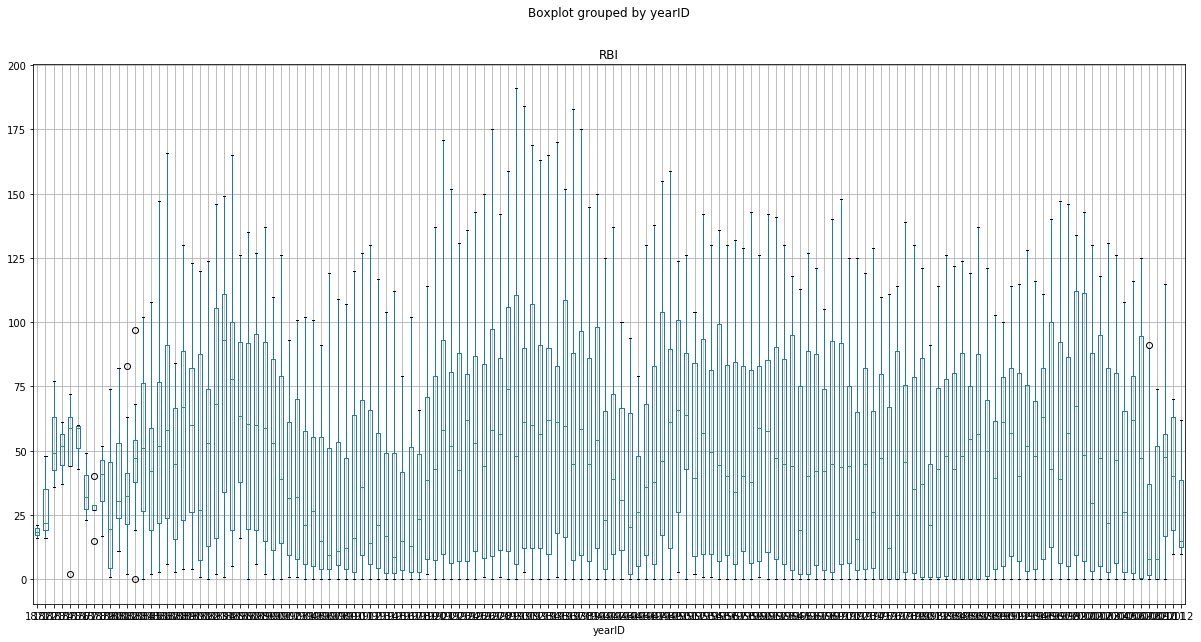

In [33]:
HOF_Batting.boxplot("RBI", by="yearID", figsize=(20, 10))

# Chi Squared Test
## To see representation from each decade in the Hall of Fame

In [51]:
#Using GroupBy playerID to get career statistics for players
HOF_per_decade= HOF_Batting.groupby(['Decade']).agg({
             'playerID': 'nunique',
      
}).reset_index()
HOF_per_decade



,Decade,playerID
0,80s,32
1,00s,16
2,10s,5
3,50s,38
4,60s,33
5,70s,37
6,90s,29


In [68]:
#Using GroupBy playerID to get career statistics for players
HOF_per_decade= HOF_Batting.groupby(['Decade']).agg({'playerID': 'nunique',}).reset_index()
HOF_per_decade

,Decade,playerID
0,80s,32
1,00s,16
2,10s,5
3,50s,38
4,60s,33
5,70s,37
6,90s,29


In [69]:
HOF_per_decade.set_index('Decade', inplace=True)
HOF_per_decade.rename(columns={'playerID': 'HOF Count'}, inplace=True)
HOF_per_decade

,HOF Count
Decade,
80s,32
00s,16
10s,5
50s,38
60s,33
70s,37
90s,29


In [70]:
HOF_per_decade['Expected'] = 33.8
HOF_per_decade


,HOF Count,Expected
Decade,,
80s,32,33.8
00s,16,33.8
10s,5,33.8
50s,38,33.8
60s,33,33.8
70s,37,33.8
90s,29,33.8


In [71]:
select_HOF_per_decade = HOF_per_decade.drop(['00s', '10s'])

In [72]:
select_HOF_per_decade


,HOF Count,Expected
Decade,,
80s,32,33.8
50s,38,33.8
60s,33,33.8
70s,37,33.8
90s,29,33.8


In [73]:
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [74]:
stats.chisquare(select_HOF_per_decade['HOF Count'], select_HOF_per_decade['Expected'])

Power_divergenceResult(statistic=1.6213017751479293, pvalue=0.8049585443876979)

* There is no significant difference in HOF representation across the decades. Though the 90s has a lower than expected

# End Chi Squared